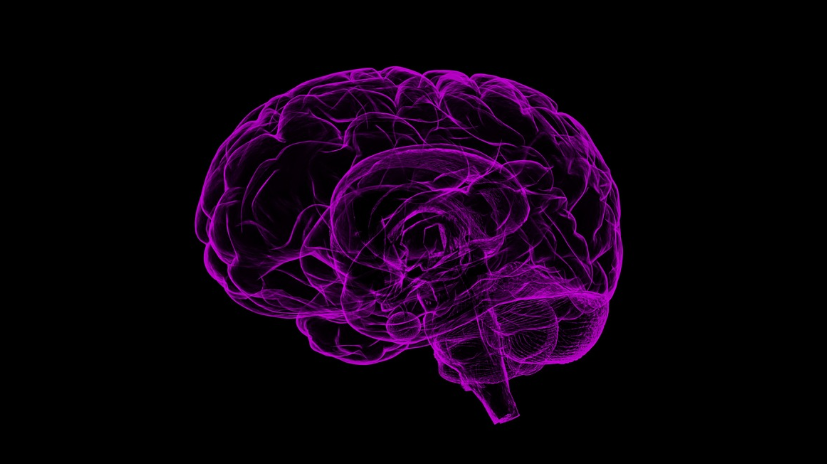

# Disclaimer! This kernel is only for educational purposes and made for fun therefor the content of the kernel should not be taken seriously.

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#grafs
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# Data importering

In [ ]:
import pandas as pd
#oasis_cross_sectional = pd.read_csv("../input/mri-and-alzheimers/oasis_cross-sectional.csv")
dt = pd.read_csv("../input/mri-and-alzheimers/oasis_longitudinal.csv")

# Data visualisering

In [ ]:
dt.describe()

In [ ]:
dt.head(5)

In [ ]:
import missingno as msno
msno.matrix(dt)

In [ ]:
dt.isnull().sum()

# Missing values

In [ ]:
#complete missing SES and MMSE with median
dt['SES'].fillna(dt['SES'].median(), inplace = True)
dt['MMSE'].fillna(dt['MMSE'].median(), inplace = True)

In [ ]:
#Seeing if the missing values are gone
dt.isnull().sum()

# Data cleaning/prep

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = dt.copy()
X_test_full = dt.copy()
test=dt.copy()
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['CDR'], inplace=True)
y = X.CDR              
X.drop(['CDR'], axis=1, inplace=True)
   
    
    # Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
# Low cardinality means that the column contains a lot of “repeats” in its data range.
# Examples of categorical variables are race, sex, age group, and educational level. 
# While the latter two variables may also be considered in a numerical manner by using exact values for age 
# and highest grade completed
# nunique() function to find the number of unique values over the column axis. So when it finds over 10 uniqe 
# values and the cname is a 
# dtype 'object' which means Data type objects are useful for creating structured arrays. 
# A structured array is the one which contains different types of data.

### one line meaning of above####
## for cname in a dataframes column shall return a value to 'low_cardinality_cols' if there are more then 10 uniqe values
## and the dtype shall be a object which is a structured array that can have different types of data (lik; int, float string ect.)


# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
### for cname (every value, one at the time) in dataframe for columns return a value to 'numeric_cols' if the 
### dtype= int64 or float64. 



# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [ ]:
X_train.head()

In [ ]:
y.head()

## removes ValueError: Unknown label type: ‘continuous’

In [ ]:
#The code below label encode the target, and convert it to int. This removes the 
#problem of -  ValueError: Unknown label type: ‘continuous’

# Simple example for beginers how to adress ""
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils


lab_enc = preprocessing.LabelEncoder() #label encodint
training_scores_encoded = lab_enc.fit_transform(y_train) #change target for label encoding
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))  #make y_trian a int
print(utils.multiclass.type_of_target(training_scores_encoded)) 

training_scores_encoded is the new y_train

# Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBRegressor


model2 = RandomForestClassifier(n_estimators=150, max_depth=4, random_state=1)
model = GradientBoostingClassifier(random_state=1)
model3 = DecisionTreeClassifier(max_depth=3, random_state=1)
#model=SGDClassifier(random_state=1)
#model=ExtraTreesClassifier(random_state=1)
#model = XGBRegressor()
# Define the models
model_1 = RandomForestClassifier(n_estimators=50, random_state=0)
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_3 = RandomForestClassifier(n_estimators=200, min_samples_split=20, random_state=0)
model_4 = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=1)



model.fit(X_train, training_scores_encoded)
y_predictions = model.predict(X_valid)

print('model accuracy score',model.score(X_valid,y_predictions))

# Predictions/ more models

In [ ]:
model2.fit(X_train, training_scores_encoded)
print('model2 accuracy score',model2.score(X_valid,y_predictions))
model.fit(X_train, training_scores_encoded)
print('model accuracy score',model.score(X_valid,y_predictions))
model3.fit(X_train, training_scores_encoded)
print('model3 accuracy score',model3.score(X_valid,y_predictions))

In [ ]:
model_1.fit(X_train, training_scores_encoded)
print('model_1 accuracy score',model_1.score(X_valid,y_predictions))
model_2.fit(X_train, training_scores_encoded)
print('model_2 accuracy score',model_2.score(X_valid,y_predictions))
model_3.fit(X_train, training_scores_encoded)
print('model_3 accuracy score',model_3.score(X_valid,y_predictions))
model_4.fit(X_train, training_scores_encoded)
print('model_4 accuracy score',model_4.score(X_valid,y_predictions))